# ReporterScreen sample / guide quality report

Examine the quality of the guide and samples and masks the low-quality guides and samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm
import perturb_tools as pt
import bean as be
from bean.qc.utils import fill_in_missing_samples

plt.style.use("default")

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_id = "LDLRCDS"
save_format = "png"
bdata_path = "../results/mapped/LDLRCDS/bean_count_LDLRCDS_combined.h5ad"
out_bdata_path = "../results/mapped/LDLRCDS/bean_count_LDLRCDS_masked.h5ad"
rel_pos_is_reporter=False
edit_quantification_start_pos = 2
edit_quantification_end_pos = 7
target_pos_col = "target_pos"
count_correlation_thres = 0.7
edit_rate_thres = 0.1
posctrl_col = "group"
posctrl_val = "PosCtrl"
lfc_thres = -0.1
replicate_label = "replicate"
condition_label = "condition"
comp_cond1 = "top"
comp_cond2 = "bot"
ctrl_cond = "bulk"
recalculate_edits = True
tiling = None
base_edit_data = True
remove_bad_replicates = False
reporter_length = 32
reporter_right_flank_length = 6

In [3]:
# Parameters
bdata_path = "bean_count_LDLvar_combined.copy2.h5ad"
out_bdata_path = "bean_count_LDLvar_combined.copy2.filtered.h5ad"
tiling = None
edit_quantification_start_pos = 2
edit_quantification_end_pos = 7
target_pos_col = "target_pos"
rel_pos_is_reporter = False
count_correlation_thres = 0.7
edit_rate_thres = 0.1
posctrl_col = "target_group"
posctrl_val = "PosCtrl"
lfc_thres = -0.1
replicate_label = "rep"
condition_label = "bin"
comp_cond1 = "top"
comp_cond2 = "bot"
ctrl_cond = "bulk"
exp_id = "bean_count_LDLvar_combined.copy2.qc_report"
recalculate_edits = True
base_edit_data = True
remove_bad_replicates = False
reporter_length = 32
reporter_right_flank_length = 6


In [4]:
bdata = be.read_h5ad(bdata_path)

In [5]:
if tiling is not None:
    bdata.uns['tiling'] = tiling
elif 'tiling' in bdata.uns:
    tiling = bdata.uns['tiling']
else:
    raise ValueError("Ambiguous assignment if the screen is a tiling screen. Provide `--tiling=True` or `tiling=False`.")
if "target_base_change" in bdata.uns and "target_base_changes" not in bdata.uns:
    bdata.uns["target_base_changes"] = bdata.uns["target_base_change"]
bdata.uns["reporter_length"] = reporter_length
bdata.uns["reporter_right_flank_length"] = reporter_right_flank_length
if posctrl_col:
    if posctrl_col not in bdata.guides.columns:
        raise ValueError(f"--posctrl-col argument '{posctrl_col}' is not present in the input ReporterScreen.guides.columns {bdata.guides.columns}. If you do not want to use positive control gRNA annotation for LFC calculation, feed --posctrl-col='' instead.")
    if posctrl_val not in bdata.guides[posctrl_col].tolist():
        raise ValueError(f"--posctrl-val argument '{posctrl_val}' is not present in the input ReporterScreen.guides[{posctrl_col}]: {bdata.guides[posctrl_col].value_counts()}. Please check your input. If you do not want to use positive control gRNA annotation for LFC calculation, feed --posctrl-col='' instead.")

In [6]:
if not isinstance(replicate_label, str):
    bdata.uns["sample_covariates"] = replicate_label[1:]
bdata.samples["replicate"] = bdata.samples[replicate_label] = bdata.samples[replicate_label].astype(str)
bdata.samples["condition"] = bdata.samples[condition_label]

Add dummy samples if not paired

In [7]:
bdata = fill_in_missing_samples(bdata, condition_label, replicate_label)

In [8]:
bdata.samples

,bin,rep,replicate,condition
rep5_top,top,rep5,rep5,top
rep5_high,high,rep5,rep5,high
rep5_bulk,bulk,rep5,rep5,bulk
rep5_low,low,rep5,rep5,low
rep5_bot,bot,rep5,rep5,bot
rep6_top,top,rep6,rep6,top
rep6_high,high,rep6,rep6,high
rep6_bulk,bulk,rep6,rep6,bulk
rep6_low,low,rep6,rep6,low
rep6_bot,bot,rep6,rep6,bot


In [9]:
for qc_col in ["gini_X", "median_corr_X", f"median_lfc_corr.{comp_cond1}_{comp_cond2}","mean_editing_rate", "mask"]:
    if qc_col in bdata.samples:
        del bdata.samples[qc_col]
n_cols_samples = len(bdata.samples.columns)

In [10]:
bdata.guides

,Unnamed: 0,target,Target descriptor,Arbitrary number,gRNA position category,Target base position in gRNA,Target base position in reporter,BE,target_group,sequence,reporter,barcode,5-nt PAM,offset,target_pos,target_group2,masked_sequence,masked_barcode
name,,,,,,,,,,,,,,,,,,
CONTROL_1_g1,0,CONTROL,NaN,1,g1,4,10,ABE,NegCtrl,CCTACGCGGTAGGGAACTTT,CCAAGCCCTACGCGGTAGGGAACTTTGGGAGC,GTTT,GGGAG,-10,9,NegCtrl,CCTGCGCGGTGGGGGGCTTT,GTTT
CONTROL_1_g2,1,CONTROL,NaN,1,g2,5,11,ABE,NegCtrl,CCCTACGCGGTAGGGAACTT,TCCAAGCCCTACGCGGTAGGGAACTTTGGGAG,AACA,TGGGA,-11,10,NegCtrl,CCCTGCGCGGTGGGGGGCTT,GGCG
CONTROL_1_g3,2,CONTROL,NaN,1,g3,5,12,ABE,NegCtrl,CCCTACGCGGTAGGGAACT,GTCCAAGCCCTACGCGGTAGGGAACTTTGGGA,CGCT,TTGGG,-12,11,NegCtrl,CCCTGCGCGGTGGGGGGCT,CGCT
CONTROL_1_g4,3,CONTROL,NaN,1,g4,7,13,ABE,NegCtrl,AGCCCTACGCGGTAGGGAAC,CGTCCAAGCCCTACGCGGTAGGGAACTTTGGG,TGAG,TTTGG,-13,12,NegCtrl,GGCCCTGCGCGGTGGGGGGC,TGGG
CONTROL_1_g5,4,CONTROL,NaN,1,g5,8,14,ABE,NegCtrl,AAGCCCTACGCGGTAGGGAA,ACGTCCAAGCCCTACGCGGTAGGGAACTTTGG,GTAT,CTTTG,-14,13,NegCtrl,GGGCCCTGCGCGGTGGGGGG,GTGT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9987289_Maj_ABE_347_g1,3450,rs9987289,Maj,347,g1,3,10,ABE,Variant,GCATCAATATCACGTGGAA,TGCTTGGGCATCAATATCACGTGGAACCAGCC,CAGT,CCAGC,-10,9,Variant,GCGTCGGTGTCGCGTGGGG,CGGT
rs9987289_Maj_ABE_347_g2,3451,rs9987289,Maj,347,g2,4,11,ABE,Variant,GGCATCAATATCACGTGGA,ATGCTTGGGCATCAATATCACGTGGAACCAGC,TCGC,ACCAG,-11,10,Variant,GGCGTCGGTGTCGCGTGGG,TCGC
rs9987289_Maj_ABE_347_g3,3452,rs9987289,Maj,347,g3,6,12,ABE,Variant,TGGGCATCAATATCACGTGG,GATGCTTGGGCATCAATATCACGTGGAACCAG,GCAC,AACCA,-12,11,Variant,TGGGCGTCGGTGTCGCGTGG,GCGC


Annotate unannotated samples & log-normalize guides

In [11]:
#bdata.samples[[replicate_label, condition_label]] = bdata.samples.index.to_series().str.split("_", expand=True)

In [12]:
bdata.log_norm()

## Sample quality

### Visualize quality metrics

#### 1. Guide coverage

<Axes: title={'center': 'Guide coverage'}, xlabel='counts', ylabel='# guides'>

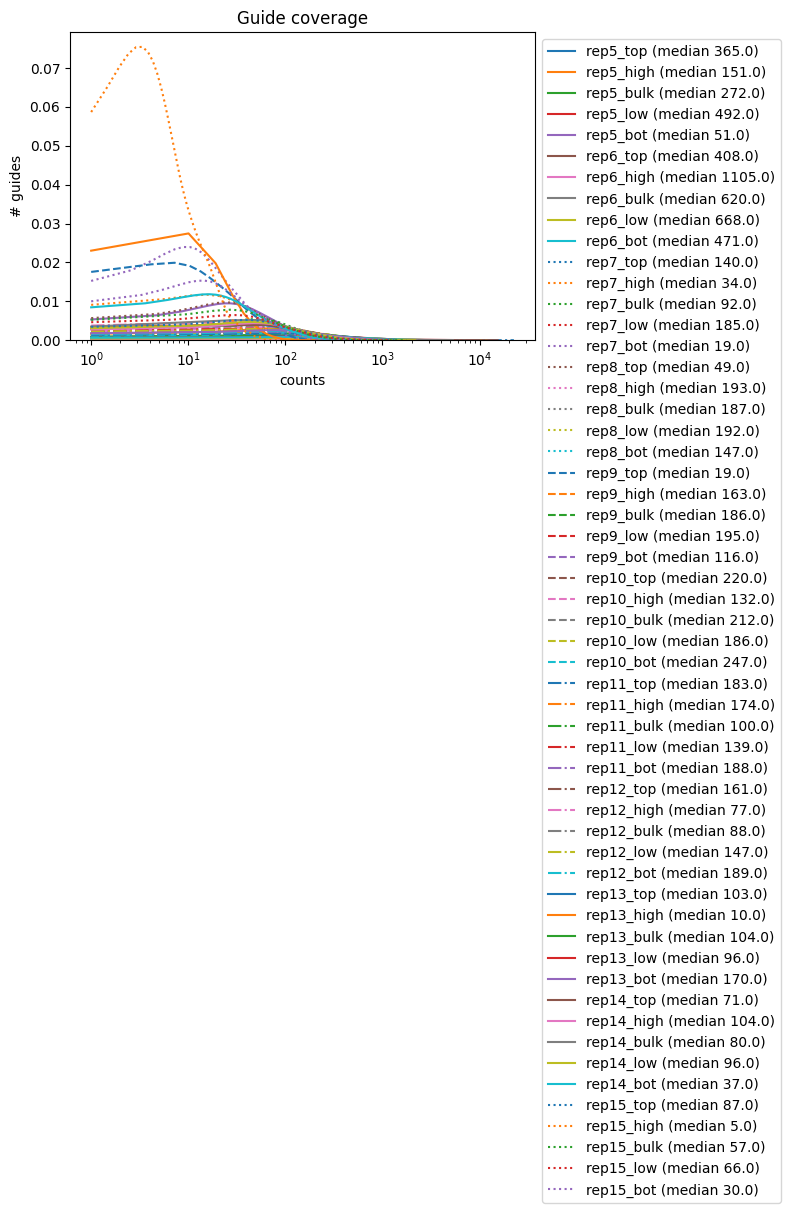

In [13]:
pt.qc.plot_guide_coverage(bdata, figsize=(6,4))


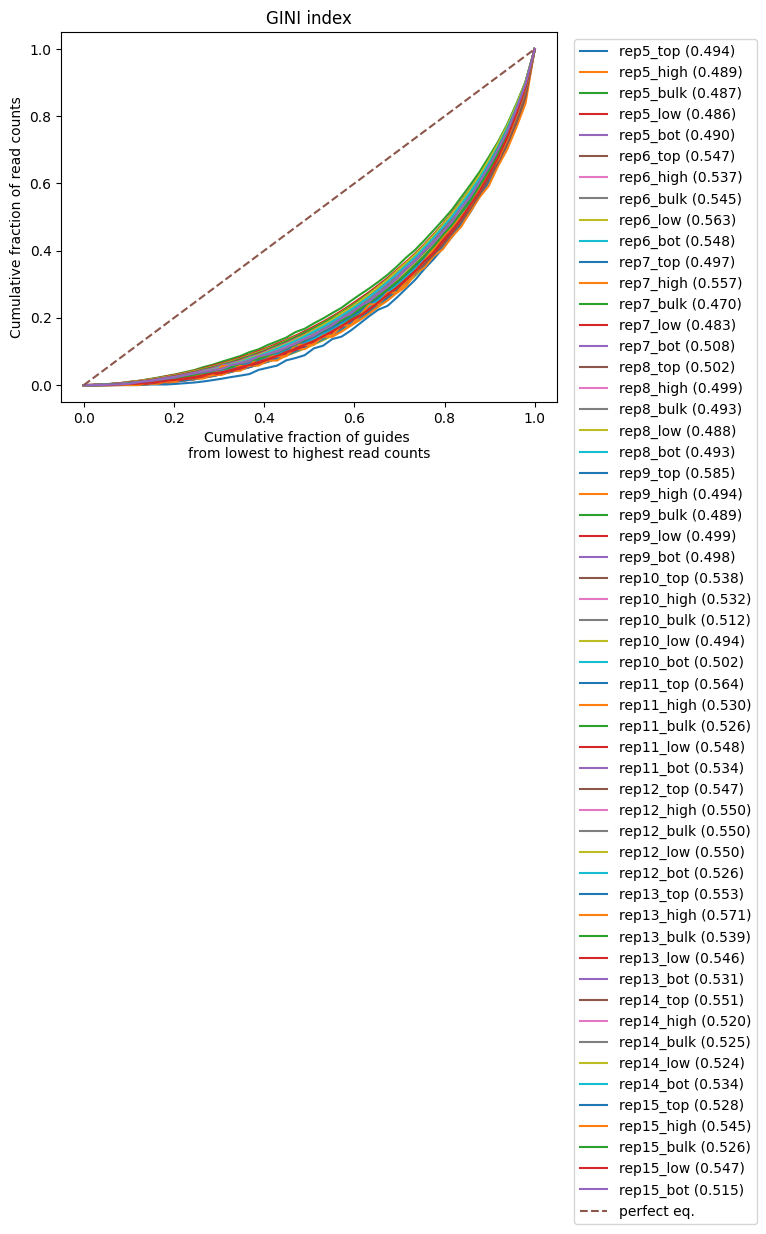

In [14]:
plt.style.use('default')
pt.qc.plot_X_gini(bdata)
plt.savefig(f"{exp_id}_gini.{save_format}")

#### 2. Guide abundance correlation

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


<Axes: title={'center': 'corr_X'}>

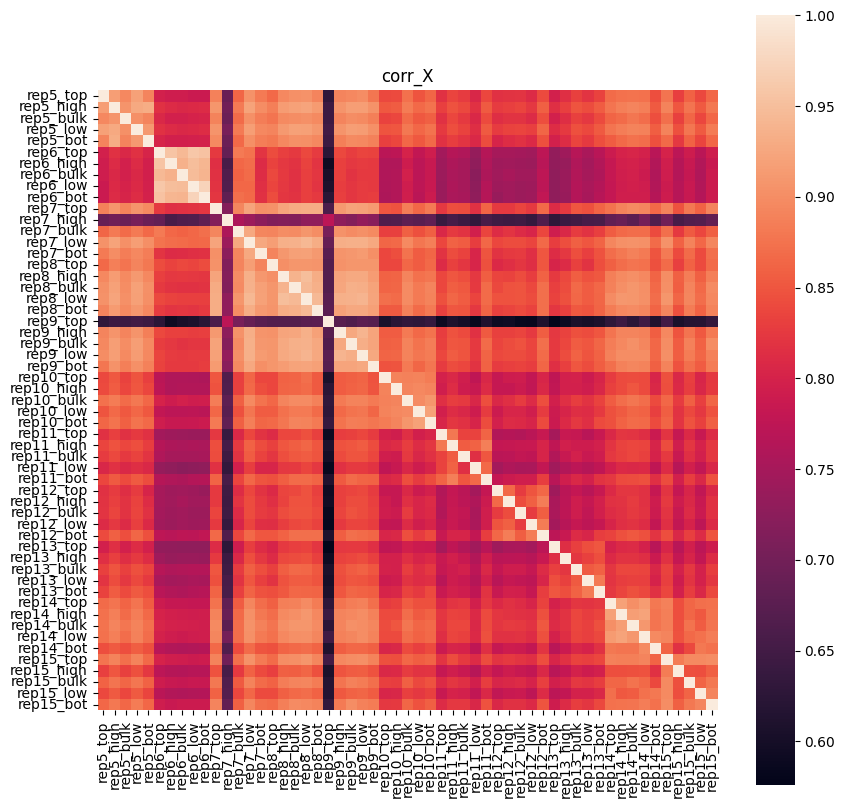

In [15]:
pt.qc.plot_correlation(bdata, "Spearman")

#### 3. LFC correlation of positive controls

In [16]:
selected_guides = bdata.guides[posctrl_col] == posctrl_val if posctrl_col else ~bdata.guides.index.isnull()
print(f"Calculating LFC correlation of {sum(selected_guides)} {'positive control' if posctrl_col else 'all'} guides.")

Calculating LFC correlation of 453 positive control guides.


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


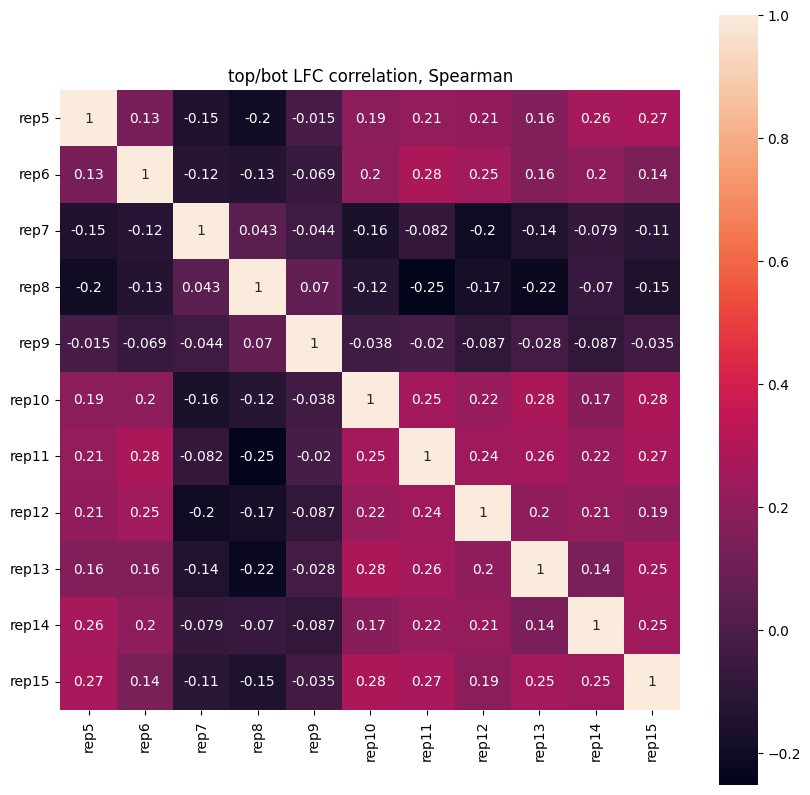

In [17]:
ax = pt.qc.plot_lfc_correlation(
    bdata,
    selected_guides,
    method="Spearman",
    cond1=comp_cond1,
    cond2=comp_cond2,
    rep_col=replicate_label,
    compare_col=condition_label,
    figsize=(10, 10),
)

ax.set_title("top/bot LFC correlation, Spearman")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

#### 4. Guide editing rates

In [18]:
if "target_base_changes" not in bdata.uns or not base_edit_data:
    bdata.uns["target_base_changes"] = ""
    base_edit_data = False
    print("Not a base editing data or target base change not provided. Passing editing-related QC")
    edit_rate_threshold = -0.1
elif recalculate_edits or "edits" not in bdata.layers.keys() or bdata.layers['edits'].max() == 0:
    if 'allele_counts' in bdata.uns.keys():
        bdata.uns['allele_counts'] = bdata.uns['allele_counts'].loc[bdata.uns['allele_counts'].allele.map(str) != ""]
        bdata.get_edit_from_allele()
        bdata.get_edit_mat_from_uns(
            rel_pos_start=edit_quantification_start_pos, 
            target_pos_col=target_pos_col,
            rel_pos_end=edit_quantification_end_pos, 
            rel_pos_is_reporter=rel_pos_is_reporter
        )

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/framework/ReporterScreen.py:413: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  - guide_len[edits.guide_idx].reset_index(drop=True)


New edit matrix saved in .layers['edits']. Returning old edits.


name
CONTROL_1_g1                0.385519
CONTROL_1_g2                0.788316
CONTROL_1_g3                0.549059
CONTROL_1_g4                0.113092
CONTROL_1_g5                0.274008
                              ...   
rs9987289_Maj_ABE_347_g1    0.201292
rs9987289_Maj_ABE_347_g2    0.446482
rs9987289_Maj_ABE_347_g3    0.211429
rs9987289_Maj_ABE_347_g4    0.184318
rs9987289_Maj_ABE_347_g5    0.238628
Name: edit_rate, Length: 3455, dtype: float64


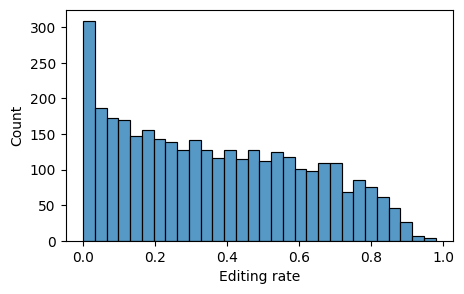

In [19]:
if "target_base_changes" not in bdata.uns or not base_edit_data:
    print(
        "Not a base editing data or target base change not provided. Passing editing-related QC"
    )
elif "edits" in bdata.layers.keys():
    bdata.get_guide_edit_rate(
        editable_base_start=edit_quantification_start_pos,
        editable_base_end=edit_quantification_end_pos,
        condition_col=condition_label,
        unsorted_condition_label=ctrl_cond,
    )
    be.qc.plot_guide_edit_rates(bdata)

### 5. Variant coverage

/tmp/ipykernel_46891/541120945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_guides = bdata.guides.groupby("target").size()


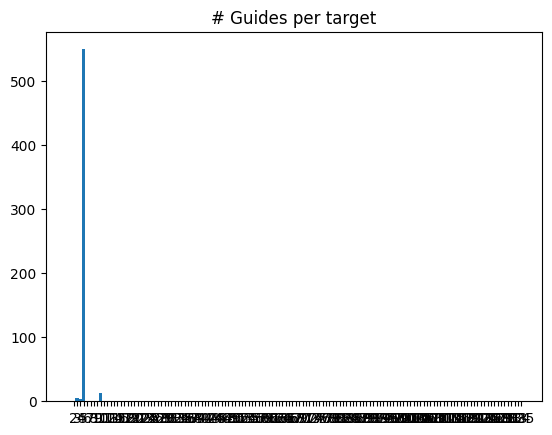

In [20]:
if not tiling:
    n_guides = bdata.guides.groupby("target").size()
    int_bins = np.arange(min(0.5, n_guides.min() - 0.5), n_guides.max() + 0.5, 1)
    plt.hist(n_guides, bins=int_bins)
    plt.xticks(np.arange(n_guides.min() - 1, n_guides.max() + 1, 1))
    plt.title("# Guides per target")

/tmp/ipykernel_46891/4196427530.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_edits = bdata.guides.groupby("target")["edit_rate"].sum()


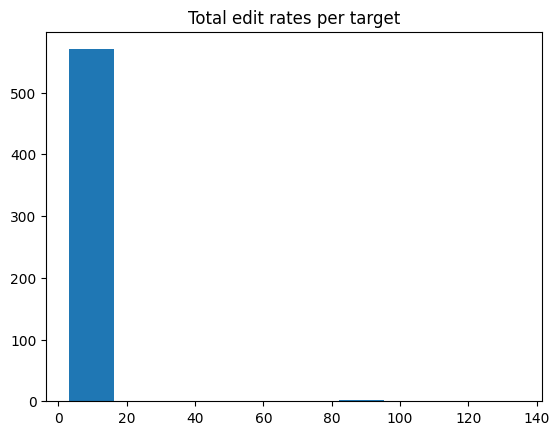

In [21]:
if "target_base_changes" not in bdata.uns or not base_edit_data:
    print(
        "Not a base editing data or target base change not provided. Passing editing-related QC"
    )
elif not tiling:
    total_edits = bdata.guides.groupby("target")["edit_rate"].sum()
    plt.hist(n_guides)
    plt.title("Total edit rates per target")

### Mask low-quality samples

In [22]:
bdata.samples.style.background_gradient(cmap="coolwarm_r")

,bin,rep,replicate,condition,gini_X,median_corr_X,median_lfc_corr.top_bot
rep5_top,top,rep5,rep5,top,0.493510,0.848909,0.175194
rep5_high,high,rep5,rep5,high,0.488701,0.866966,0.175194
rep5_bulk,bulk,rep5,rep5,bulk,0.486657,0.850945,0.175194
rep5_low,low,rep5,rep5,low,0.486369,0.864541,0.175194
rep5_bot,bot,rep5,rep5,bot,0.489634,0.852060,0.175194
rep6_top,top,rep6,rep6,top,0.546780,0.796851,0.151233
rep6_high,high,rep6,rep6,high,0.536605,0.790187,0.151233
rep6_bulk,bulk,rep6,rep6,bulk,0.545218,0.789376,0.151233
rep6_low,low,rep6,rep6,low,0.562569,0.788251,0.151233
rep6_bot,bot,rep6,rep6,bot,0.547677,0.789220,0.151233


Assign sample mask to mask low-quality samples.

In [23]:
mdata = bdata.samples.copy()
# Data has positive control
for col in mdata.columns.tolist():
    mdata[col]=1.0

mdata.loc[
    bdata.samples.median_corr_X.isnull() | (bdata.samples.median_corr_X < count_correlation_thres),
    "median_corr_X",
] = 0.0
if "mean_editing_rate" in bdata.samples.columns.tolist():
    mdata.loc[bdata.samples.mean_editing_rate < edit_rate_thres, "mean_editing_rate"] = 0

mdata.loc[
    bdata.samples[f"median_lfc_corr.{comp_cond1}_{comp_cond2}"] < lfc_thres,
    f"median_lfc_corr.{comp_cond1}_{comp_cond2}",
] = 0.0
if posctrl_col:
    print("filter with posctrl LFC")
    mdata.loc[
        bdata.samples[f"median_lfc_corr.{comp_cond1}_{comp_cond2}"].isnull(),
        f"median_lfc_corr.{comp_cond1}_{comp_cond2}",
    ] = 0.0


filter with posctrl LFC


In [24]:
def b_g(s, cmap='coolwarm_r', low=0, high=1):
    a = mdata.loc[:,s.name].copy()
    if s.name not in mdata.columns.tolist()[n_cols_samples:]:
        a[:] = 1.0
    # rng = a.max() - a.min()
    # norm = colors.Normalize(a.min() - (rng * low),
    #                     a.max() + (rng * high))
    # normed = norm(a.values)
    c = [colors.rgb2hex(x) for x in matplotlib.cm.get_cmap(cmap)(a.values)]
    return ['background-color: %s' % color for color in c]
print("Failing QC is shown as red:")
bdata.samples.style.apply(b_g)

Failing QC is shown as red:


/tmp/ipykernel_46891/4158322437.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = [colors.rgb2hex(x) for x in matplotlib.cm.get_cmap(cmap)(a.values)]


,bin,rep,replicate,condition,gini_X,median_corr_X,median_lfc_corr.top_bot
rep5_top,top,rep5,rep5,top,0.493510,0.848909,0.175194
rep5_high,high,rep5,rep5,high,0.488701,0.866966,0.175194
rep5_bulk,bulk,rep5,rep5,bulk,0.486657,0.850945,0.175194
rep5_low,low,rep5,rep5,low,0.486369,0.864541,0.175194
rep5_bot,bot,rep5,rep5,bot,0.489634,0.852060,0.175194
rep6_top,top,rep6,rep6,top,0.546780,0.796851,0.151233
rep6_high,high,rep6,rep6,high,0.536605,0.790187,0.151233
rep6_bulk,bulk,rep6,rep6,bulk,0.545218,0.789376,0.151233
rep6_low,low,rep6,rep6,low,0.562569,0.788251,0.151233
rep6_bot,bot,rep6,rep6,bot,0.547677,0.789220,0.151233


In [25]:
# leave replicate with more than 1 sorting bin data
print(mdata)
print(n_cols_samples)

bdata.samples["mask"] = mdata.iloc[:,n_cols_samples:].astype(int).all(axis=1).astype(int).tolist()
if remove_bad_replicates:
    rep_n_samples = bdata.samples.groupby(replicate_label)["mask"].sum()
    print(rep_n_samples)
    rep_has_too_small_sample = rep_n_samples.loc[rep_n_samples < 2].index.tolist()
    print(
        f"Excluding reps {rep_has_too_small_sample} that has less than 2 samples per replicate."
    )
    if isinstance(replicate_label, str):
        samples_include = ~bdata.samples[replicate_label].isin(
            rep_has_too_small_sample
        )
    else:
        bdata.samples["_rc"] = bdata.samples[
            replicate_label
        ].values.tolist()
        samples_include = ~bdata.samples["_rc"].isin(rep_has_too_small_sample)
        bdata.samples.pop("_rc")
    bdata_filtered = bdata[:, samples_include]
    if isinstance(replicate_label, str) and len(bdata_filtered.samples[replicate_label].unique()) <= 1 or isinstance(replicate_label, list) and len(bdata_filtered.samples[replicate_label].drop_duplicates() <= 1): 
        raise ValueError("Too small number of replicate left after QC. Check the input data or adjust the QC metric thresholds.")
else:
    bdata_filtered = bdata

            bin  rep  replicate  condition  gini_X  median_corr_X  \
rep5_top    1.0  1.0        1.0        1.0     1.0            1.0   
rep5_high   1.0  1.0        1.0        1.0     1.0            1.0   
rep5_bulk   1.0  1.0        1.0        1.0     1.0            1.0   
rep5_low    1.0  1.0        1.0        1.0     1.0            1.0   
rep5_bot    1.0  1.0        1.0        1.0     1.0            1.0   
rep6_top    1.0  1.0        1.0        1.0     1.0            1.0   
rep6_high   1.0  1.0        1.0        1.0     1.0            1.0   
rep6_bulk   1.0  1.0        1.0        1.0     1.0            1.0   
rep6_low    1.0  1.0        1.0        1.0     1.0            1.0   
rep6_bot    1.0  1.0        1.0        1.0     1.0            1.0   
rep7_top    1.0  1.0        1.0        1.0     1.0            1.0   
rep7_high   1.0  1.0        1.0        1.0     1.0            0.0   
rep7_bulk   1.0  1.0        1.0        1.0     1.0            1.0   
rep7_low    1.0  1.0        1.0   

In [26]:
bdata_filtered.samples.style.background_gradient(cmap="coolwarm_r")

,bin,rep,replicate,condition,gini_X,median_corr_X,median_lfc_corr.top_bot,mask
rep5_top,top,rep5,rep5,top,0.493510,0.848909,0.175194,1
rep5_high,high,rep5,rep5,high,0.488701,0.866966,0.175194,1
rep5_bulk,bulk,rep5,rep5,bulk,0.486657,0.850945,0.175194,1
rep5_low,low,rep5,rep5,low,0.486369,0.864541,0.175194,1
rep5_bot,bot,rep5,rep5,bot,0.489634,0.852060,0.175194,1
rep6_top,top,rep6,rep6,top,0.546780,0.796851,0.151233,1
rep6_high,high,rep6,rep6,high,0.536605,0.790187,0.151233,1
rep6_bulk,bulk,rep6,rep6,bulk,0.545218,0.789376,0.151233,1
rep6_low,low,rep6,rep6,low,0.562569,0.788251,0.151233,1
rep6_bot,bot,rep6,rep6,bot,0.547677,0.789220,0.151233,1


## Identify outlier guides

In [27]:
outlier_guides, mask = be.qc.get_outlier_guides_and_mask(bdata_filtered, condit_col = condition_label, replicate_col = replicate_label)

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


                         name     sample           RPM    rep
0    rs11320208_Maj_ABE_40_g2   rep6_top  15442.003906   rep6
1    rs4149311_Min_ABE_483_g2   rep6_top  13587.925781   rep6
2   rs56267346_Maj_ABE_235_g2   rep6_top  14266.458008   rep6
3                CONTROL_1_g3   rep9_top  43769.902344   rep9
4                LDLR_SA_2_g1   rep9_top  54505.914062   rep9
..                        ...        ...           ...    ...
77               CONTROL_2_g5  rep11_bot  71914.976562  rep11
78   rs3750944_Min_ABE_471_g2  rep11_bot  86463.968750  rep11
79               CONTROL_2_g5  rep13_bot  39321.183594  rep13
80              LDLR_SD_15_g2  rep13_bot  18775.865234  rep13
81   rs3750944_Min_ABE_471_g2  rep14_bot  23418.855469  rep14

[82 rows x 4 columns]


In [28]:
outlier_guides


,name,sample,RPM,rep
0,rs11320208_Maj_ABE_40_g2,rep6_top,15442.003906,rep6
1,rs4149311_Min_ABE_483_g2,rep6_top,13587.925781,rep6
2,rs56267346_Maj_ABE_235_g2,rep6_top,14266.458008,rep6
3,CONTROL_1_g3,rep9_top,43769.902344,rep9
4,LDLR_SA_2_g1,rep9_top,54505.914062,rep9
...,...,...,...,...
77,CONTROL_2_g5,rep11_bot,71914.976562,rep11
78,rs3750944_Min_ABE_471_g2,rep11_bot,86463.968750,rep11
79,CONTROL_2_g5,rep13_bot,39321.183594,rep13
80,LDLR_SD_15_g2,rep13_bot,18775.865234,rep13


In [29]:
outlier_guides_n_samples = outlier_guides['name'].value_counts()
guides_to_exclude = outlier_guides_n_samples.loc[outlier_guides_n_samples > 2].index
guides_to_exclude

Index(['rs3750944_Min_ABE_471_g2', 'CONTROL_2_g5', 'rs34468565_Maj_ABE_170_g4',
       'rs2301249_Maj_ABE_145_g1', 'LDLR_SD_15_g2'],
      dtype='object', name='name')

In [30]:
bdata_filtered.uns['repguide_mask'] = mask

In [31]:
bdata_filtered = bdata_filtered[~bdata_filtered.guides.index.isin(guides_to_exclude),:]

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [32]:
bdata_filtered

Genome Editing Screen comprised of n_guides x n_conditions = 3450 x 55
   guides:    'Unnamed: 0', 'target', 'Target descriptor', 'Arbitrary number', 'gRNA position category', 'Target base position in gRNA', 'Target base position in reporter', 'BE', 'target_group', 'sequence', 'reporter', 'barcode', '5-nt PAM', 'offset', 'target_pos', 'target_group2', 'masked_sequence', 'masked_barcode', 'edit_rate'
   samples:   'bin', 'rep', 'replicate', 'condition', 'gini_X', 'median_corr_X', 'median_lfc_corr.top_bot', 'mask'
   samples_m: 
   samples_p: 
   layers:    'X_bcmatch', 'edits', 'lognorm_counts', 'X_RPM'
   uns:       'allele_counts', 'edit_counts', 'target_base_change', 'target_base_changes', 'tiling', 'reporter_length', 'reporter_right_flank_length', 'lfc', 'lfc_corr', 'repguide_mask'

In [33]:
bdata_filtered.uns['repguide_mask'].shape

(3450, 11)

In [34]:
bdata_filtered.write(out_bdata_path)

... storing 'rep' as categorical


... storing 'replicate' as categorical
